sigma bacchetta
[5.76056944e-08]

msimulation
7680233356.406263
merrsimulation
1.2277186155839883e-07
qsimulation
5.492189097889209e-17
qerrsimulation
2.5471259536606383e-17

mdata
7685317911.71475
merrdata
47043941.00741007
qdata
0.014510501528858454
qerrdata
0.010992429790396128


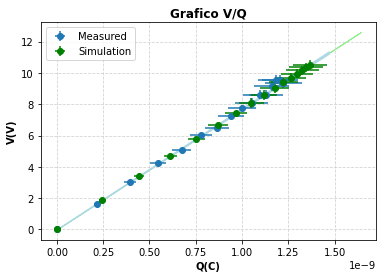

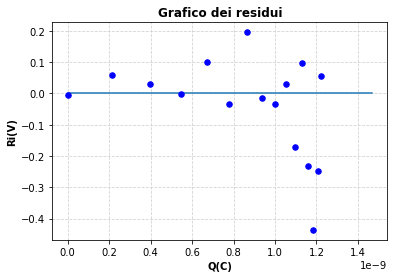

sigma_post_fit
0.17014255125208702
chiquadro
12.96606841315532
chiquadroridotto
0.9261477437968085
sigma_PF_Pesata
[0.02887097 0.02887097 0.09623657 0.09623657 0.09623657 0.09623657
 0.09623657 0.09623657 0.09623657 0.28870971 0.28870971 0.28870971
 0.28870971 0.28870971 0.28870971 0.28870971]
Verr
[0.03 0.03 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.3  0.3  0.3  0.3  0.3
 0.3  0.3 ]


In [78]:
#generatore attaccato alla sfera 1000VDC, bacchettata alla sfera
#misurare carica bacchetta sulla gabbia con l'elettrometro per induzione
#attaccare l'elettrometro al condensatore e dargli la bacchettata

#capire qual'è il punto del condensatore da toccare per avere la carica esatta
#ottenuta dalla lettura sulla gabbia

#poi misurare V con l'elettrometro, ripetere le misure con altre bacchettate
#toccando sempre sfera e condensatore nello stesso punto


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

eps0 = 8.859E-12

d = 0.002
derr = 0.0002
#commentare
d = d-np.random.normal(0, derr, 1)

Dc = 0.18
Dcerr = 0.0001
Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

b = eps0*A
berr = b*A_err/A

Cc = b/d
Ccerr = Cc*(A_err/A+derr/d)

D2 = 0.15
D1 = 0.1
D2err = 0.01
D1err = 0.0001
L = 0.15
Lerr = 0.0001

DBacchetta = 0.04
DBerr = 0.0001
SBacchetta = np.pi*DBacchetta**2
SBacchettaerr = SBacchetta*2*DBerr/DBacchetta

Cg = 2*np.pi*eps0*L/np.log(D2/D1)
epsL = Lerr/L
errlnD2 = D2err/D2
epslnD2 = errlnD2/np.abs(np.log(D2))
errlnD1 = D1err/D1
epslnD1 = errlnD1/np.abs(np.log(D1))
Cgerr = Cg*(epsL+epslnD1+epslnD2)

Sicepail = np.pi*D1/2*L
Sicepailerr = Sicepail*(Lerr/L+D1err/D1)

Ce = 2.74424417e-11
Ce_err = 2.06085147e-12

Veg = 4.94334415
Vegerr = 0.1
Veg = Veg-np.random.normal(0, Vegerr, 1)
#Veg = 
Qgsimulata = Veg*(Cg+Ce)
Qgsimulataerr = Qgsimulata*((((Cgerr)**2+Ce_err**2)**(1/2)/(Cg+Ce))**2+(Vegerr/Veg)**2)**(1/2)

QBacchetta = Qgsimulata*(1+SBacchetta/Sicepail)
QBacchettaerr = QBacchetta*(Qgsimulataerr/Qgsimulata+(SBacchettaerr+Sicepailerr)/(SBacchetta+Sicepail)+Sicepailerr/Sicepail)

Vec = np.array([0.00001,1.65984812,3.04616976,4.20403938,5.17110359,5.97880524,6.65340568,7.21683867,7.68742351,8.08046064,8.40872916,8.6829023,8.91189442,9.10315092,9.26289025,9.39630612])
#commentare
Vecerr = np.ones(len(Vec))
for i in range(len(Vecerr)):
	if(Vec[i]<25):
		Vecerr[i] = 0.3
		if(Vec[i]<8):
			Vecerr[i] = 0.1
		if(Vec[i]<2.5):
			Vecerr[i] = 0.03

Q = Vec*(Cc+Ce)
Qerr = Q*((((Ccerr)**2+Ce_err**2)**(1/2)/(Cc+Ce))**2+(Vecerr/Vec)**2)**(1/2)

Vec = Vec-np.random.normal(0, Vecerr, len(Vec))
#Vec = np.array([])
#Vecerr = np.array([])

Qsimulation = np.zeros(len(Vec))
Qsimulationerr = np.zeros(len(Vec))
Vesimulation = np.zeros(len(Vec))
Vesimulationerr = np.zeros(len(Vec))
for i in range(1,len(Vec)):
  Qsimulation[i] = (Qsimulation[i-1]+QBacchetta)*A/(A+SBacchetta)
  Qsimulationerr[i] = Qsimulation[i]*((Qsimulationerr[i-1]+QBacchettaerr)/(Qsimulation[i-1]+QBacchetta)+(A_err/A)+(A_err+SBacchettaerr)/(A+SBacchetta))
  Vesimulation[i] = Qsimulation[i]/(Cc+Ce)

for i in range(len(Vesimulationerr)):
	if(Vesimulation[i]<25):
		Vesimulationerr[i] = 0.3
		if(Vesimulation[i]<8):
			Vesimulationerr[i] = 0.1
		if(Vesimulation[i]<2.5):
			Vesimulationerr[i] = 0.03

print("sigma bacchetta")
print(QBacchetta/SBacchetta)



fig = plt.figure()
ax = fig.gca()
plt.title("Grafico V/Q",fontweight="bold")
plt.xlabel("Q(C)",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Q, Vec, yerr=Vecerr, xerr=Qerr, fmt='o',label="Measured")
plt.errorbar(Qsimulation,Vesimulation, yerr=Vesimulationerr, xerr=Qsimulationerr ,color = 'green', fmt='o',label="Simulation")

fit,cov = np.polyfit(Qsimulation,Vesimulation, 1,w = 1/Vesimulationerr,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (Vesimulationerr**2+(m*Qsimulationerr)**2)**(1/2)
fit,cov = np.polyfit(Qsimulation,Vesimulation, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit

print("\nmsimulation")
print(m)
print("merrsimulation")
print(merr)
print("qsimulation")
print(q)
print("qerrsimulation")
print(qerr)

x = np.linspace(min(Qsimulation),max(Qsimulation)*1.2,1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)


fit,cov = np.polyfit(Q,Vec, 1,w = 1/Vecerr,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (Vecerr**2+(m*Qerr)**2)**(1/2)
fit,cov = np.polyfit(Q,Vec, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit

print("\nmdata")
print(m)
print("merrdata")
print(merr)
print("qdata")
print(q)
print("qerrdata")
print(qerr)

x = np.linspace(min(Q),max(Q)*1.2,1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightblue",zorder=1)



plt.legend(loc="upper left")
plt.show()


#RESIDUI DATA
Vf = q+m*Q

Ri = Vf-Vec

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui",fontweight="bold")
plt.xlabel("Q(C)",fontweight="bold")
plt.ylabel("Ri(V)",fontweight="bold")
plt.plot(np.linspace(min(Q),max(Q)*1.2,1000),np.zeros(1000))
plt.scatter(Q,Ri, s=30, color='blue',zorder=3)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET1.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ri)**2)/(len(Vf)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

chiquadro = np.sum((Ri)**2/Vecerr**2)
print("chiquadro")
print(chiquadro)
chiquadroridotto = chiquadro/(len(Vf)-2)
print("chiquadroridotto")
print(chiquadroridotto)
sigma_PF_Pesata = Vecerr*(chiquadroridotto)**(1/2)
print("sigma_PF_Pesata")
print(sigma_PF_Pesata)
print("Verr")
print(Vecerr)